# Exploratory data analysis (EDA) with Pandas in banking

# Materials
The data that I have used for this is a subset of an open source Bank Marketing Data Set from the UCI ML repository: 
https://archive.ics.uci.edu/ml/citation_policy.html.

In this Project, I have tried to give answers to a set of questions that may be relevant when analyzing banking data:

1. What is the share of clients attracted in the source data?
2. What are the mean values of numerical features among the attracted clients?
3. What is the average call duration for the attracted clients?
4. What is the average age among the attracted and unmarried clients?
5. What is the average age and call duration for different types of client employment?

In addition, I have tried to make a visual analysis in order to plan marketing banking campaigns more effectively.

In [22]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

In [27]:
# Importing Data

df = pd.read_excel(r'C:\Users\SAURAV\Desktop\Python Projects Data\Book1.xlsx')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Dataset exploration

Looking at the dataset size, feature names and their types.

In [29]:
df.shape

(41188, 21)

The dataset contains 41188 rows, for each of which 21 features are columns and including 1 target feature (y).

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [32]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [33]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


The result shows that the average client refers to administrative staff `(job = admin.)`, is married `(marital = married)` and has a university degree `(education = university.degree)`.

In [34]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

4640 clients (11.3%) of 41188 issued a term deposit, the value of the variable `y` equals `yes`.

In [35]:
df["marital"].value_counts(normalize = True)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

We can see above, 61% (0.61) of clients are married.It must be taken into account when planning marketing campaigns to manage deposit operations.

# Sorting the data

In [37]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.406,5195.8,no
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes
40537,27,admin.,single,high.school,no,no,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.888,4991.6,no
13820,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes


The above results show that the longest calls exceed one hour. At the same time, it usually was on `Mondays` and `Thursdays` and especially, in `November` and `August` (month).

In [38]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no



We can see from the above result that the youngest customers are at the age of 17, and the call duration exceeded 3 minutes only for three clients, which indicates the ineffectiveness of long-term interaction with such clients.

**Applying functions: apply, map etc.**

In [39]:
df.apply(np.max)

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
dtype: object

The oldest client is 98 years old (age = 98), and the number of contacts with one of the customers reached 56 (campaign = 56).

In [41]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Indexing and extracting data

In [42]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 11.3%


11,3% is a bad indication for a bank, with such a percentage of attracted customers a business can collapse.

In [43]:
df[df["y"] == 1].mean()

age                 40.913147
duration           553.191164
campaign             2.051724
pdays              792.035560
previous             0.492672
emp.var.rate        -1.233448
cons.price.idx      93.354386
cons.conf.idx      -39.789784
euribor3m            2.123135
nr.employed       5095.115991
y                    1.000000
dtype: float64

From the above results, the average age of the attracted clients is about **40** `age = 40.91)`, and **2** calls were required to attract them `(campaign = 2.05`.

**The average age of attracted (y == 1) and unmarried ('marital' == 'single') clients**

In [45]:
print("Average age of attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")

Average age of attracted clients = 31 years


# Visualization

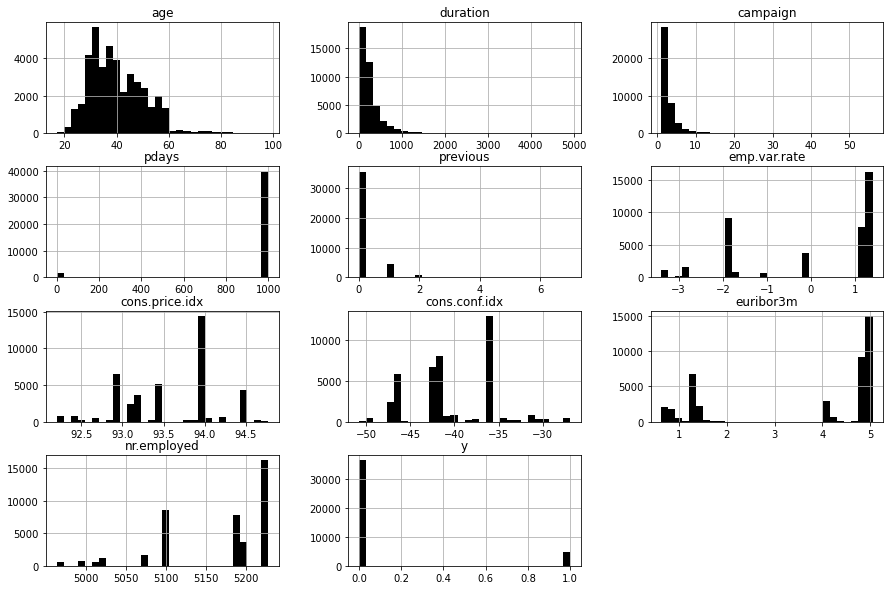

In [49]:
df.hist(color = "k",bins = 30,figsize = (15, 10))
plt.show()

**Box Plot**

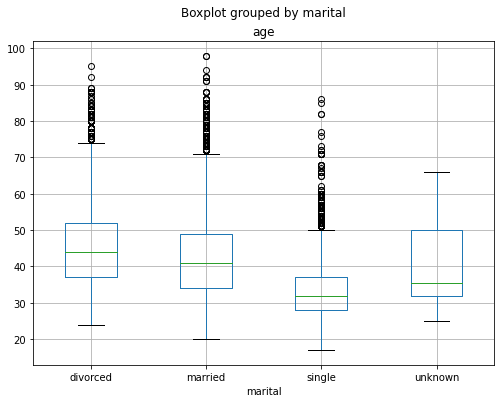

In [48]:
df.boxplot(column = "age",by = "marital")
plt.show()

The plot shows that married people are on average younger than divorced and married ones. For the last two groups, there is an outlier zone over 70 years old, and for unmarried - over 50.